In [17]:
!mkdir -p data/titanic
!curl -L https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv -o data/titanic/train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60302  100 60302    0     0   575k      0 --:--:-- --:--:-- --:--:--  577k


In [20]:
import pandas as pd

df = pd.read_csv("data/titanic/train.csv")
df.head(5)   # shows PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
df.info()    # shows which columns have missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
%pip install scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 48.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 54.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.model_selection import train_test_split

X = df[["Age", "Fare", "Sex", "Pclass", "Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# Define transformers
numeric_features   = ["Age", "Fare"]
numeric_transform  = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",   StandardScaler())
])

categorical_features  = ["Sex", "Pclass", "Embarked"]
categorical_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe",      OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Combine
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transform, numeric_features),
    ("cat", categorical_transform, categorical_features)
])

# Full pipeline
clf = Pipeline([
    ("prep", preprocessor),
    ("model", LogisticRegression(solver="liblinear"))
])


In [26]:
# Train
clf.fit(X_train, y_train)

# Accuracy
train_acc = clf.score(X_train, y_train)
test_acc  = clf.score(X_test,  y_test)
print(f"Train accuracy: {train_acc:.3%}")
print(f"Test  accuracy: {test_acc:.3%}")


Train accuracy: 80.056%
Test  accuracy: 77.095%


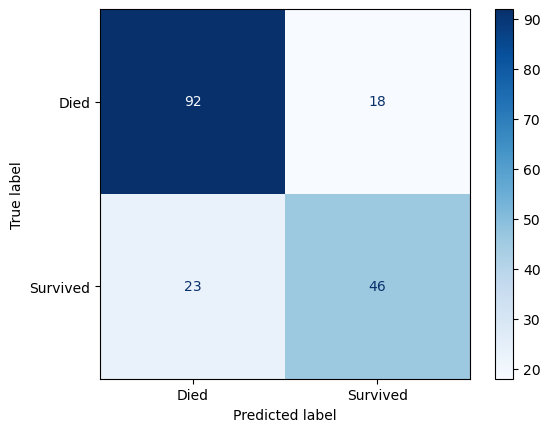

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["Died","Survived"], cmap="Blues"
)


### Confusion Matrix Interpretation

- **High true-negative rate** suggests the model correctly identifies passengers who did not survive.
- **False negatives** (survived → died) represent passengers we “would have lost” in our predictions.
- To balance sensitivity vs. specificity, we could adjust the decision threshold or try different models.
